#Validacion
#Test de Sync
#**Fase 1 | Avance de Proyecto**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Operaciones de Aprendizaje Automático**
####**Tecnológico de Monterrey**
#####**Prof L José Ángel Martínez Navarro**

#Prueba de Sync 2

#Prueba de Sync 3 Luz

#Prueba de Sync 3 From Google

#Prueba de Sync 4 From Google

#Prueba de Sync 5 From Javy Visual Studio Code

#Prueba de Sync 6 From Javy Visual Studio Code

###**Equipo 24:**

###
A01796937 - Sandra Luz Cervantes Espinoza

A01796697 - Mauricio Torres Baena

A01795838 - Javier Augusto Rebull Saucedo

A01360416 – David Cruz Beltrán

**Información:**

*   Dataset Turkish Music Emotion archivo "Acoustic Features.csv".


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

from scipy import stats
from sklearn.metrics  import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

from acoustic_ml.dataset import load_raw_data
from acoustic_ml.features import create_features
from acoustic_ml.modeling.predict import load_model, predict

In [5]:
from acoustic_ml.dataset import load_raw_data

df = load_raw_data()
print(f"✓ Dataset cargado correctamente: {df.shape}")

✓ Dataset cargado correctamente: (400, 51)


#**Proceso**

**Análisis exploratorio (EDA):**

*   Análisis descriptivo
* Análisis de variables numéricas
* Análisis de variables de texto
* Análisis de correlación (bivariante y multivariante)

**Preprocesamiento**
* Valores faltantes
* Valores atípicos

**Ingeniería de características**
**Entrenando y evaluando el modelo**


#**1. Análisis exploratorio (EDA)**

Estadísticas descriptivas

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [7]:
estadisticas_descriptivas = df.describe()
estadisticas_descriptivas

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


Valores únicos por variable para identificar posibles variables categóricas

In [8]:
data_df_unique = df.nunique()
data_df_unique

Class                                               4
_RMSenergy_Mean                                   196
_Lowenergy_Mean                                   166
_Fluctuation_Mean                                 377
_Tempo_Mean                                       388
_MFCC_Mean_1                                      354
_MFCC_Mean_2                                      347
_MFCC_Mean_3                                      319
_MFCC_Mean_4                                      316
_MFCC_Mean_5                                      297
_MFCC_Mean_6                                      297
_MFCC_Mean_7                                      304
_MFCC_Mean_8                                      273
_MFCC_Mean_9                                      278
_MFCC_Mean_10                                     271
_MFCC_Mean_11                                     253
_MFCC_Mean_12                                     272
_MFCC_Mean_13                                     259
_Roughness_Mean             

Búsqueda de valores faltantes

In [10]:
data_df_missing = df.isnull().sum()
data_df_missing

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

Diagrama de barras para determinar la frecuencia de las emociones

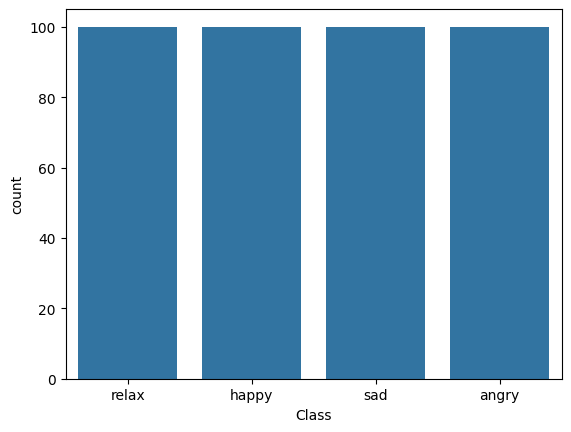

In [11]:
sns.countplot(x='Class', data=df)
plt.show()


Histogramas para cada característica numérica, para ver qué tan equilibrados están los datos

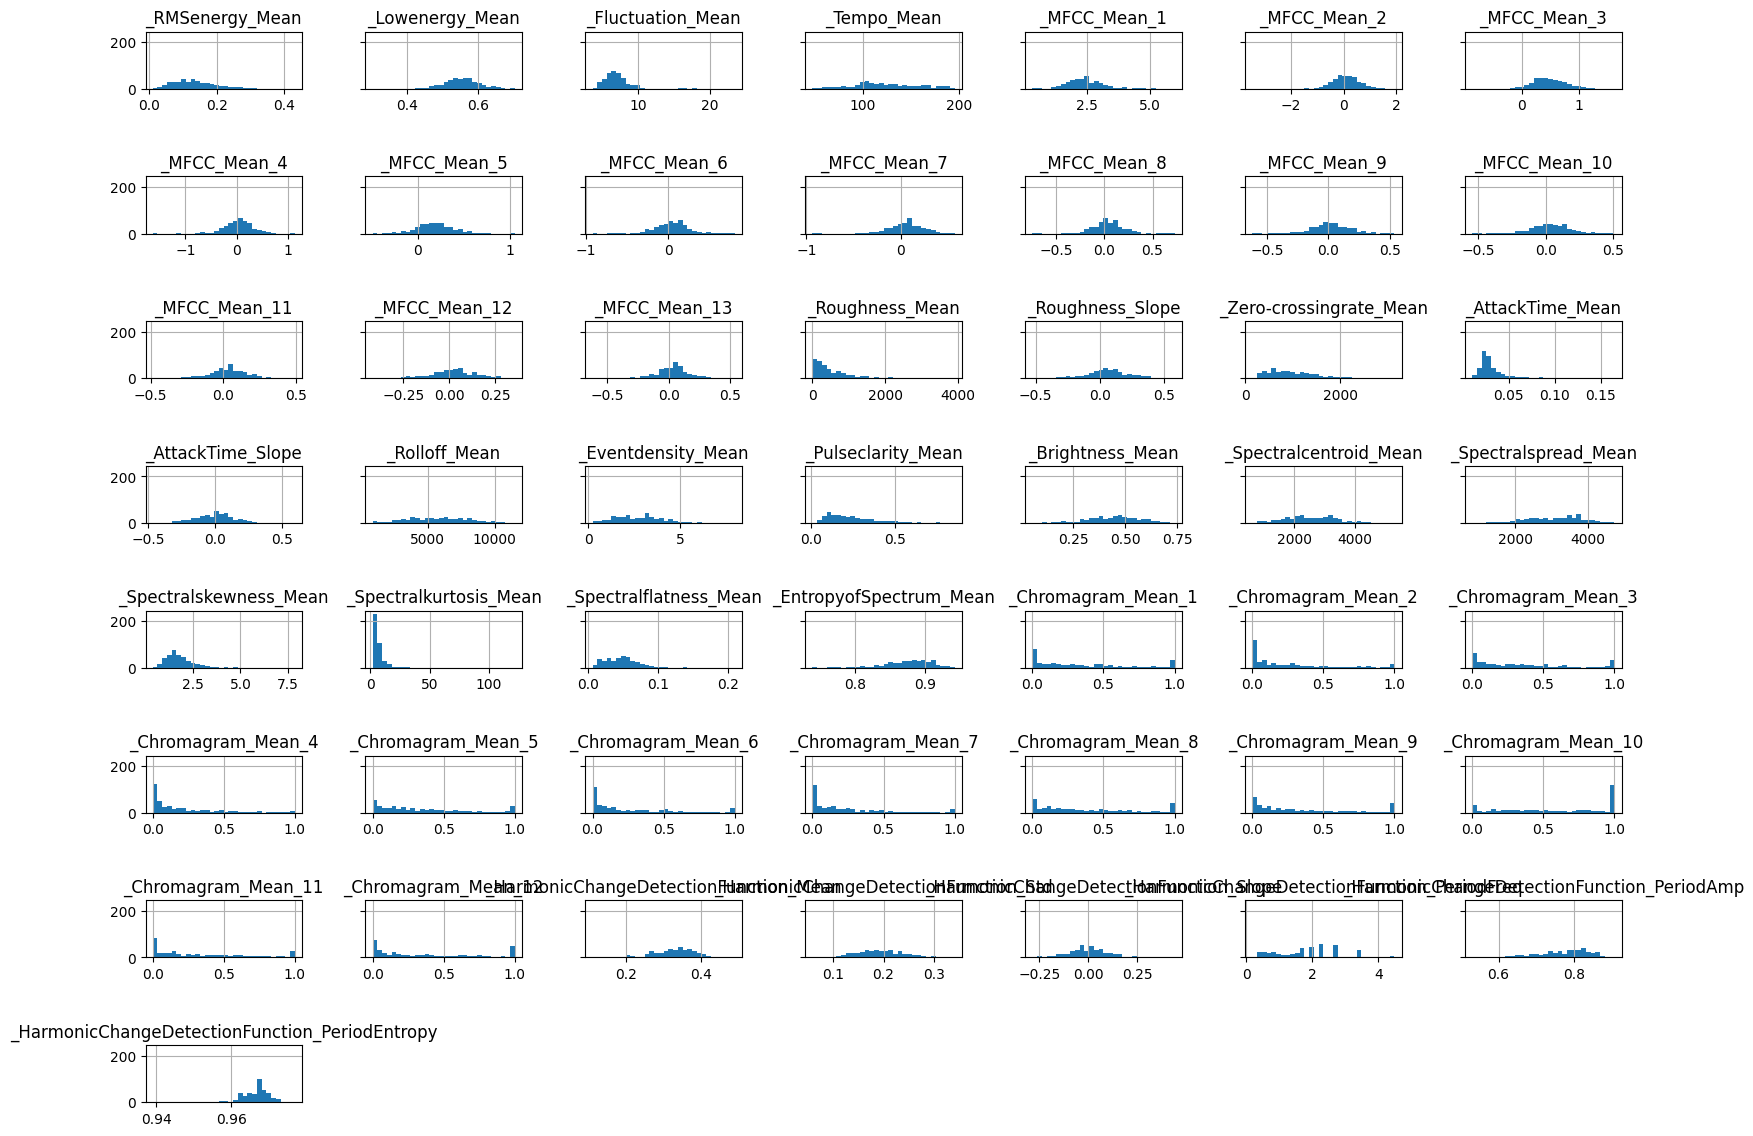

In [13]:
hist = df.hist(bins=30, sharey=True, figsize=(16, 12))
plt.tight_layout(pad=3.0)
plt.show()

Q - Q plots para ver la distribución después de haber "normalizado" los datos

In [34]:
variables_trans = df.columns.to_list()
variables_trans.remove("Class")

In [35]:
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

In [37]:
transformer.fit(df[variables_trans])

,method,'yeo-johnson'
,standardize,False
,copy,True


In [38]:
df[variables_trans] = transformer.transform(df[variables_trans])

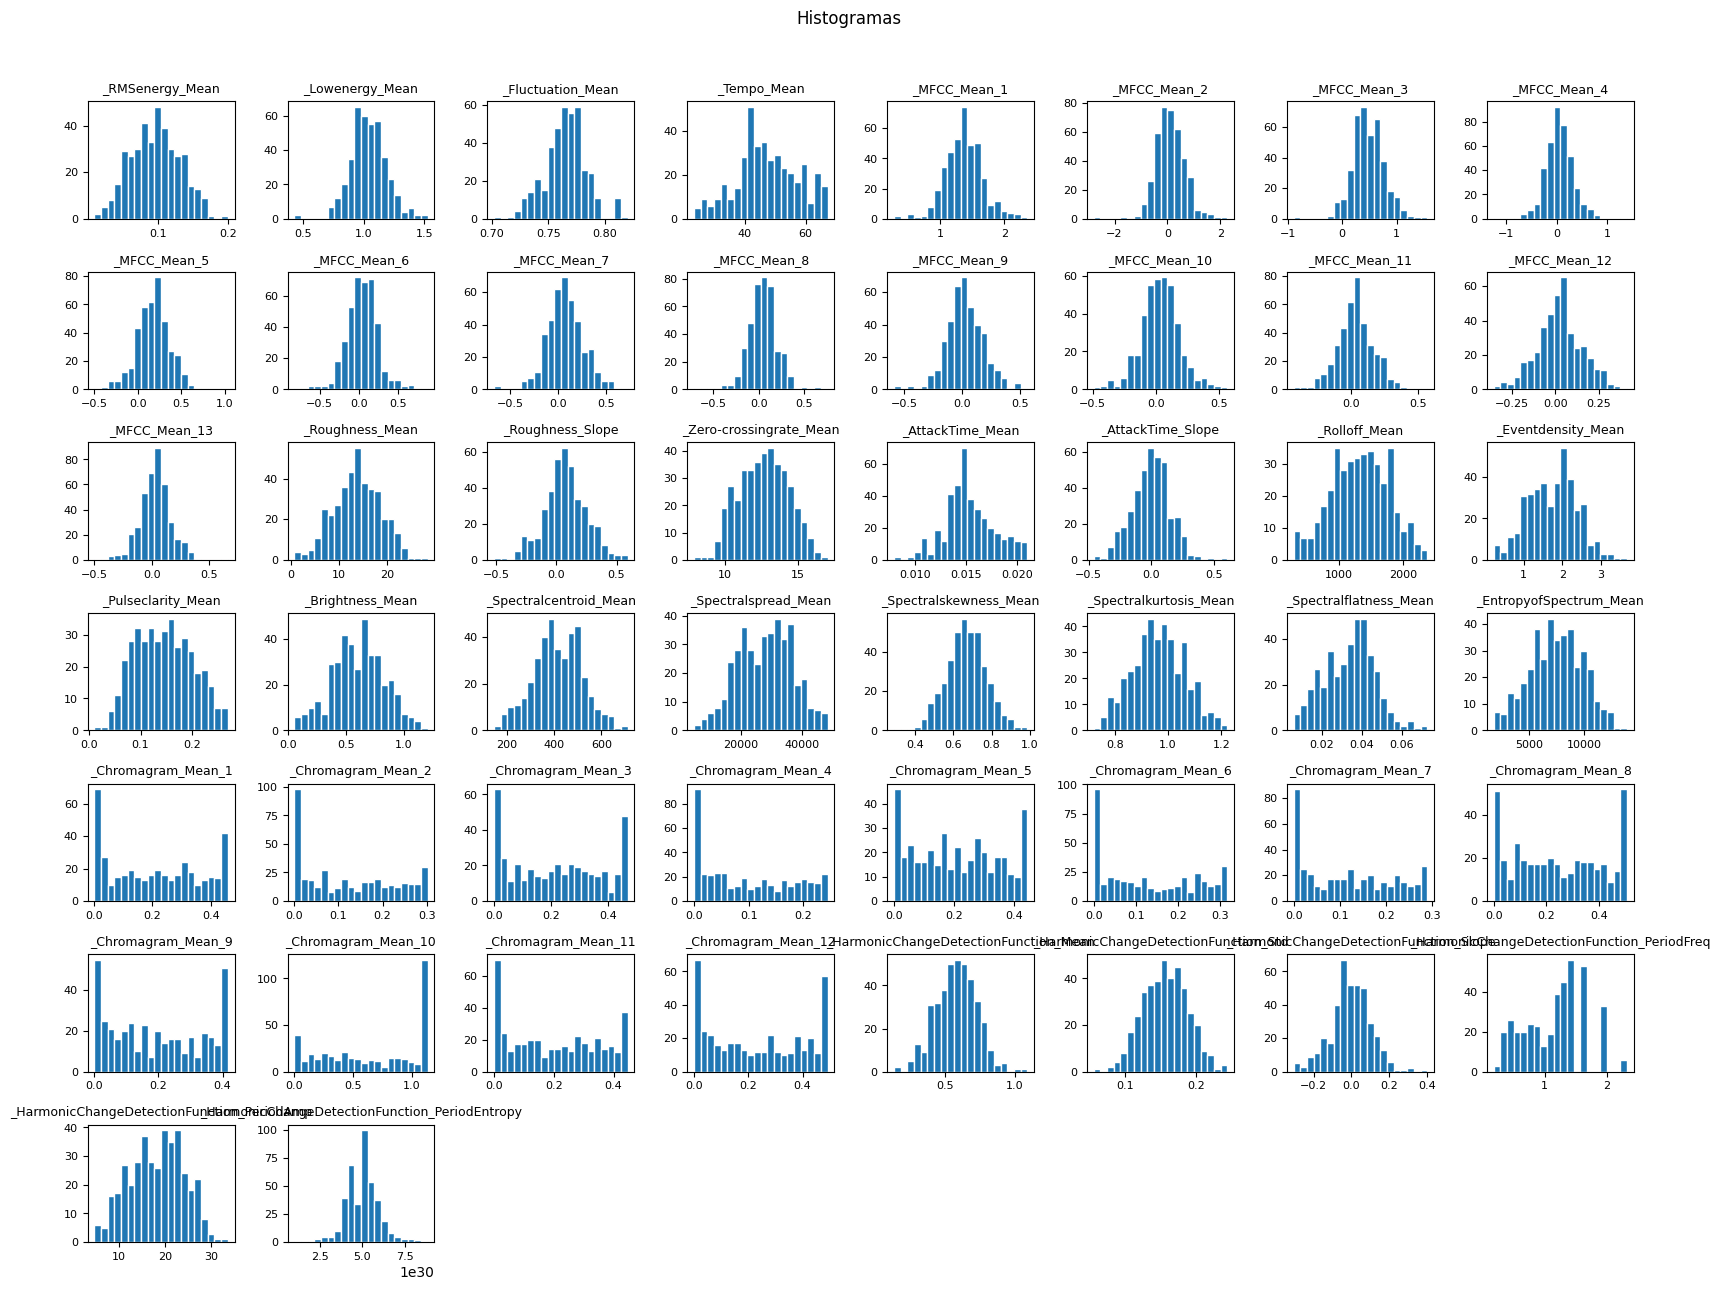

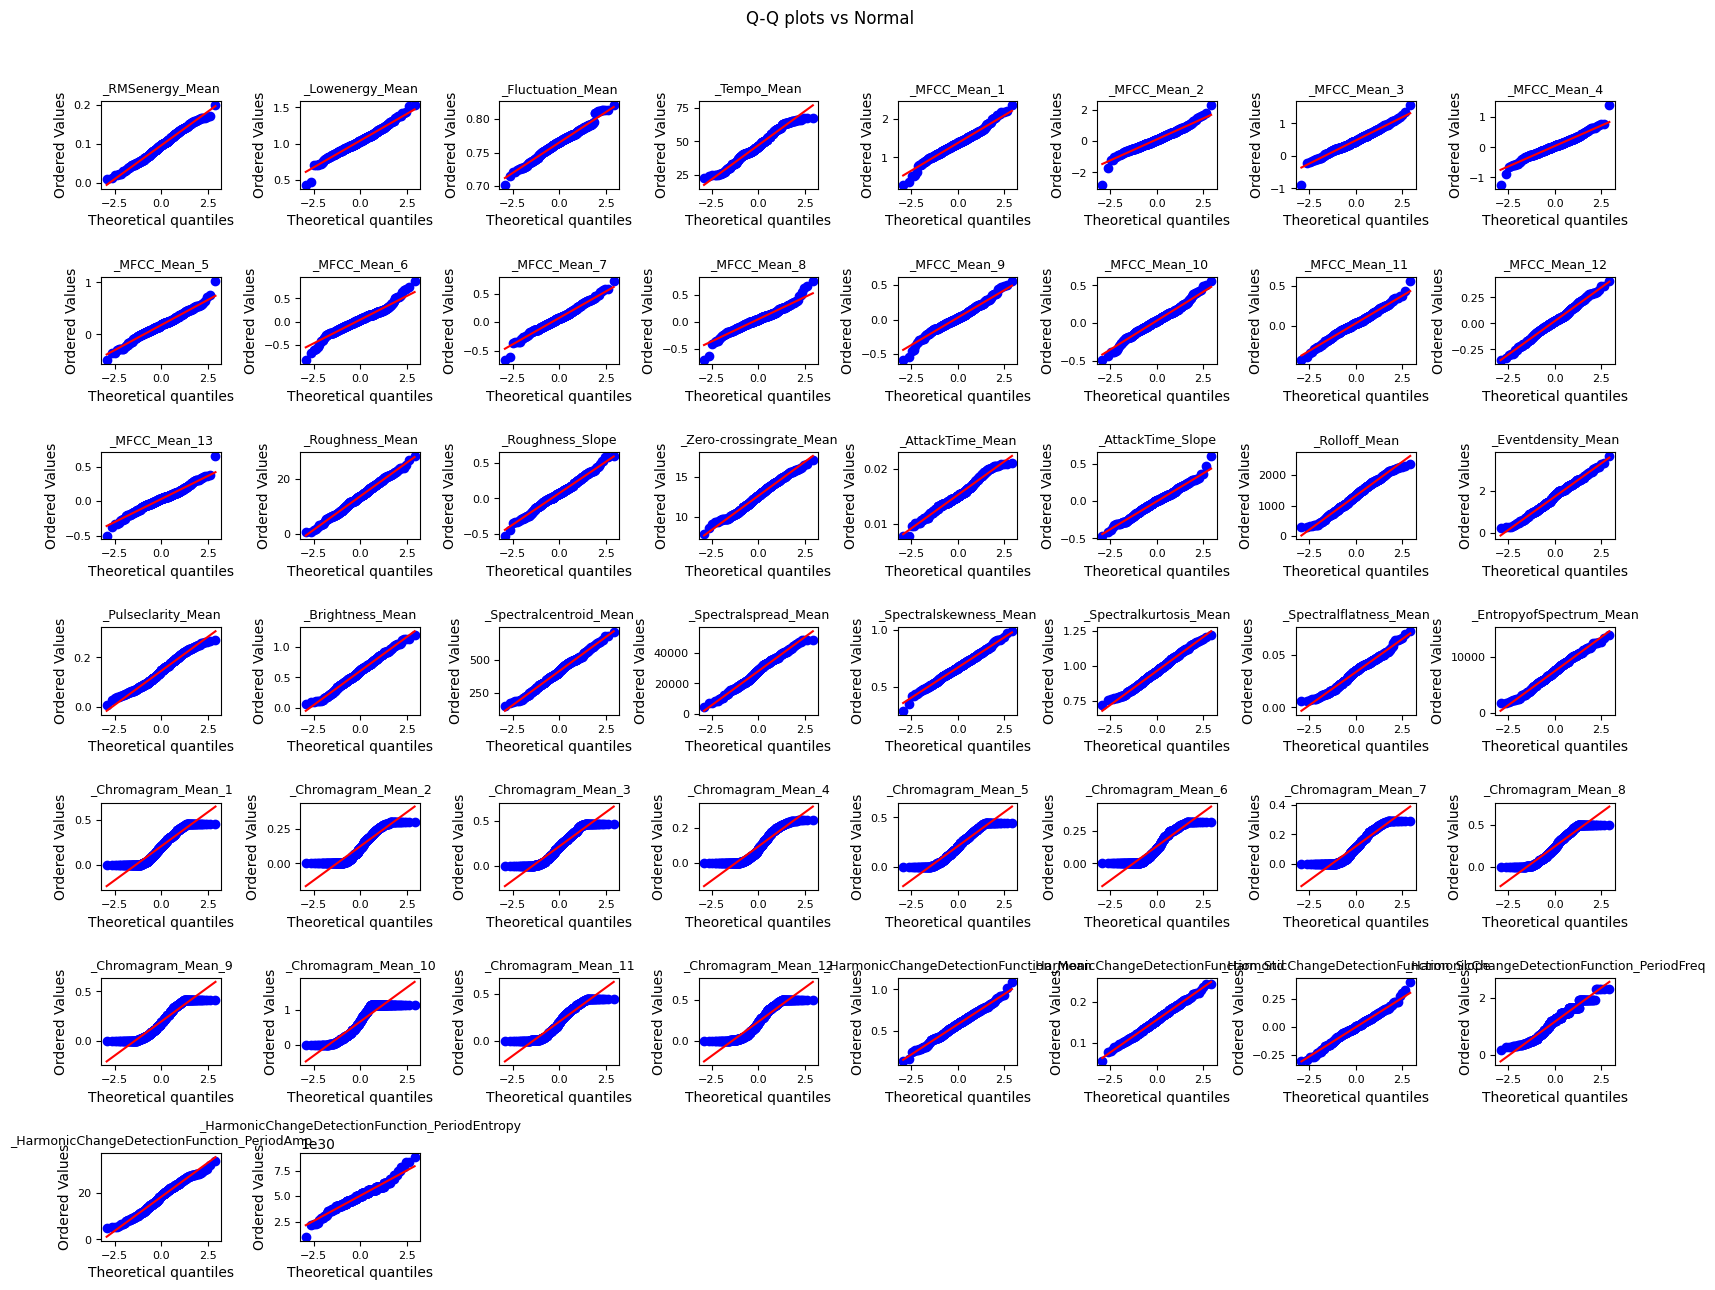

In [45]:
n = len(variables_trans)

ncols = 8
nrows = math.ceil(n / ncols)

# ---------- FIGURA 1: HISTOGRAMAS ----------
fig1, axes1 = plt.subplots(nrows, ncols, figsize=(ncols*2.0, nrows*1.8))  # plots más compactos
axes1 = axes1.flatten() if nrows*ncols > 1 else [axes1]

for i, col in enumerate(variables_trans):
    ax = axes1[i]
    data = df[col].dropna()
    ax.hist(data, bins=20, edgecolor='white')
    ax.set_title(col, fontsize=9)
    ax.tick_params(labelsize=8)

# apaga ejes sobrantes si hay
for j in range(i+1, nrows*ncols):
    axes1[j].axis('off')

fig1.suptitle('Histogramas', fontsize=12, y=1.02)
fig1.tight_layout()
plt.show()

# ---------- FIGURA 2: Q-Q PLOTS ----------
fig2, axes2 = plt.subplots(nrows, ncols, figsize=(ncols*2.0, nrows*1.8))
axes2 = axes2.flatten() if nrows*ncols > 1 else [axes2]

for i, col in enumerate(variables_trans):
    ax = axes2[i]
    data = df[col].dropna()
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(col, fontsize=9)
    ax.tick_params(labelsize=8)

for j in range(i+1, nrows*ncols):
    axes2[j].axis('off')

fig2.suptitle('Q-Q plots vs Normal', fontsize=12, y=1.02)
fig2.tight_layout()
plt.show()

Tablas de frecuencia para cada característica categórica

In [14]:
for column in df.select_dtypes(include=[ 'object', 'bool']).columns:
  display(column, pd.crosstab(index=df[column], columns='% observations', normalize='columns') * 100)

'Class'

col_0,% observations
Class,
angry,25.0
happy,25.0
relax,25.0
sad,25.0


In [15]:
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df['Class'])
df

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,2,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,2,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,2,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,2,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,0,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,0,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,0,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [ ]:
df.corr()

mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe

In [ ]:
data_df_numeric = df.select_dtypes(include=[np.number])

data_df_corr = data_df_numeric.corr()

plt.figure(figsize=(18,12))
sns.heatmap(data_df_corr, annot=True, linewidths=0.5)
plt.show()

#**Ingeniería de características**

Media, mediana, desviación estándar por clase

In [ ]:
if 'Class' in df.columns:
    numeric_cols = df.select_dtypes(include=[float, int]).columns
    numeric_cols = numeric_cols.drop('Class', errors='ignore')
    for col in numeric_cols[:5]:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x='Class', y=col, data=df)
        plt.title(f"Boxplot de {col} por clase")
        plt.tight_layout()
        plt.show()
else:
    print("La columna 'Class' no existe en el DataFrame.")


Histogramas

In [ ]:
for col in numeric_cols[:5]:
    plt.figure(figsize=(5,3))
    sns.kdeplot(data=df, x=col, hue="Class", fill=True)
    plt.title(f"Densidad de {col}")
    plt.tight_layout()
    plt.show()


Correlaciones

#**Detección de valores atípicos (outliers)**

Z‑score: marcar valores cuyo z > 3 o < −3:

In [ ]:
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outlier_mask = (z_scores > 3)
outlier_counts = outlier_mask.sum(axis=0)
outlier_counts_series = pd.Series(outlier_counts, index=numeric_cols)
outlier_counts_series.sort_values(ascending=False).head(10)


IQR (Interquartile Range)

In [ ]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

is_outlier = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
              (df[numeric_cols] > (Q3 + 1.5 * IQR)))
# cuenta
is_outlier.sum().sort_values(ascending=False).head(10)

#**Limpieza y tratamiento de datos**

Asegurar que la columna Class solo contiene las etiquetas esperadas y asegurar que las columnas numéricas no tienen valores “inf“, “NaN” u otros artefactos

In [ ]:
print(df["Class"].unique())

Revisar duplicados


In [ ]:
dup_count = df.duplicated().sum()
print("Duplicados:", dup_count)
if dup_count > 0:
    df = df.drop_duplicates()


TODO: Eliminar columnas constantes (desviación cero)

In [ ]:
stds = df[numeric_cols].std()
zero_std = stds[stds == 0].index.tolist()
print("Columnas constantes:", zero_std)
df = df.drop(columns=zero_std)

Version dataset limpio

In [ ]:
df_original.to_csv("turkish_music_emotion_raw.csv", index=False)
df.to_csv("turkish_music_emotion_cleaned.csv", index=False)

In [ ]:
X = df.loc[:,df.columns != "Class"]
Y = df.loc[:,df.columns == "Class"]
X

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [ ]:
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(X_train)
x_test = standardscaler.transform(X_test)

**Logistic Regression**

In [ ]:
logrregression = LogisticRegression(random_state=0)
logrregression.fit(x_train,Y_train.values.ravel())
y_pred = logrregression.predict(x_test)
print(y_pred)
print(Y_test)

In [ ]:
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

**KNN Classification**

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train, Y_train.values.ravel())
y_pred = model.predict(x_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

In [ ]:
model = KNeighborsClassifier(metric="manhattan")
model.fit(x_train, Y_train.values.ravel())
y_pred = model.predict(x_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

**Support Vector Machine**

In [ ]:
svc = SVC(kernel='linear')
svc.fit(x_train,Y_train.values.ravel())
y_pred = svc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(x_train,Y_train.values.ravel())
y_pred = svc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

**Gaussian Naive Bayes**

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,Y_train.values.ravel())
y_pred = gnb.predict(x_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

**Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,Y_train.values.ravel())
y_pred = dtc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

**Random Forest**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train,Y_train.values.ravel())
y_pred = rfc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

**Dimensionality Reduction**

In [ ]:
pca = PCA(n_components=8)
pca.fit(X)
x_pca = pca.transform(X)
transformed = pd.DataFrame(x_pca)
X=transformed
X

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [ ]:
x_train = standardscaler.fit_transform(X_train)
x_test = standardscaler.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, Y_train.values.ravel())

In [ ]:
y_pred = classifier.predict(x_test)
print(accuracy_score(Y_test,y_pred))

**Hyperparameter Optimization**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
])

param_grid = {'classifier__C': [0.001, 0.01, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100]}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

# Get the best hyperparameters and accuracy
best_C = grid_search.best_params_['classifier__C']
best_accuracy = grid_search.best_score_
print("Best C:", best_C)
print("Best Accuracy:", best_accuracy)


**Model Evaluation**

In [ ]:
TODO: El mejor modelo es